# Day 10 Class Exercises: Supervised Machine Learning

## Background. 
For these class exercises, we will be using the wine quality dataset which can be found at this URL:
https://archive.ics.uci.edu/ml/datasets/wine+quality. We will be using the supervised machine learning tools from the lessons to determine a model that can use physicochemical measurements of wine as a predictor of quality.  The data for these exercises can be found in the `data` directory of this repository.

<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span> Additionally, with these class exercises we learn a few new things.  When new knowledge is introduced you'll see the icon shown on the right: 

## Get Started
Import the Numpy, Pandas, Matplotlib (matplotlib magic), Seaborn and sklearn packages. 

In [2]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Exercise 1. Review the data once more
Load the wine quality data used in the Seaborn class exercises from Day 9. As a reminder, you can read about this dataset from the file [../data/winequality.names](../data/winequality.names)

Next, read in the file named `winequality-red.csv`. This data, despite the `csv` suffix, is separated using a semicolon.

In [3]:
wine = pd.read_csv('C:/Users/shres/afs505_u2/Data-Analytics-With-Python/data/winequality-red.csv', sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


How many samples (observations) do we have?

In [4]:
wine.shape

(1599, 12)

Are the data types for the columns in the dataframe appropriate for the type of data in each column?

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Any missing values?

In [6]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Any duplicated rows?

In [7]:
wine.duplicated().sum()

240

## Exercise 2: Explore the Dependent data

The quality column contains our expected outcome. Because we want to predict this score, it is our dependent variable. Wines scored as 0 are considered very bad and wines scored as 10 are very excellent.  How many samples are there per each quality of wine?

In [8]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As a reminder, view the quality distribution using a the seaborn barplot. Code similar to the following was used in Day 9 exercises. Adapt it here to fit your variables.

```python
qcounts = wine['quality'].value_counts(sort=False)
sns.barplot(x=qcounts.index, y=qcounts);
```

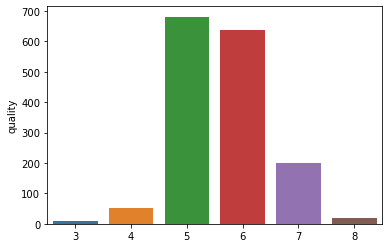

In [9]:
qcounts = wine['quality'].value_counts(sort=False)
sns.barplot(x=qcounts.index, y=qcounts);

## Exercise 3:  Explore the Independent Data

The dependent data includes our physicochemical measurements.  As a reminder, let's use a Facet Grid to reiew the range of values for each of these.  Code similar to the following was used in Day 9 exercises. Adapt it here to fit your variables.
```python
# First Melt the data
wine_t = wine.melt(id_vars='quality', var_name='measurement')

# Now create a FacetGrid and add a boxplot to it.
g = sns.FacetGrid(wine_t, col='measurement', col_wrap=6, sharex=False)
g.map(sns.boxplot, 'value', order=None);
```

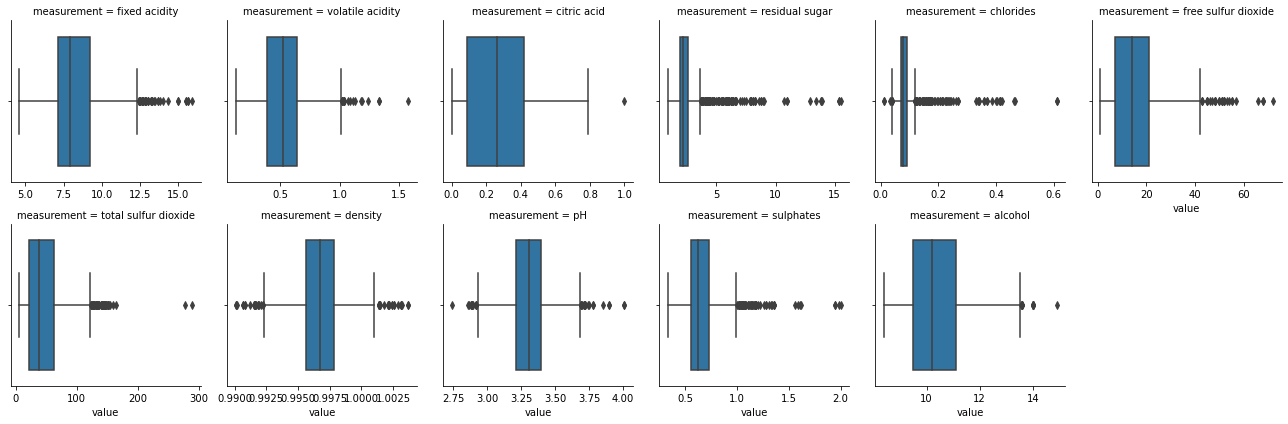

In [10]:
# First Melt the data
wine_t = wine.melt(id_vars='quality', var_name='measurement')

# Now create a FacetGrid and add a boxplot to it.
g = sns.FacetGrid(wine_t, col='measurement', col_wrap=6, sharex=False)
g.map(sns.boxplot, 'value', order=None);

To get a sense of the distribution shape of each indpednent data column use a violin plot as well.Code similar to the following was used in Day 9 exercises. Adapt it here to fit your variables.

```python
g = sns.FacetGrid(wine_t, col='measurement', col_wrap=6, sharex=False)
g.map(sns.violinplot, 'value', order=None);
```

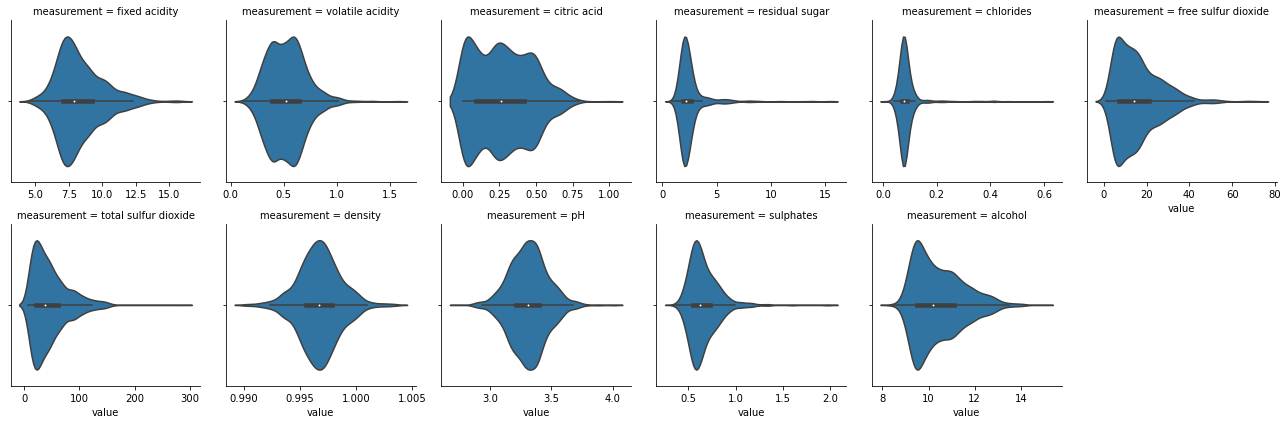

In [11]:
g = sns.FacetGrid(wine_t, col='measurement', col_wrap=6, sharex=False)
g.map(sns.violinplot, 'value', order=None);

Next, let's look for columns that might show correlation with other columns. Remember, colinear data can bias some supervised machine learning models, so for data columns that are highly correlated we should remove those. Code similar to the following was used in Day 9 exercises. Adapt it here to fit your variables.

```python
# Limit the plot to only 500 points to help reduce overplotting
sns.pairplot(wine.sample(500), hue='quality', palette="tab10");
```

C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\shres\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

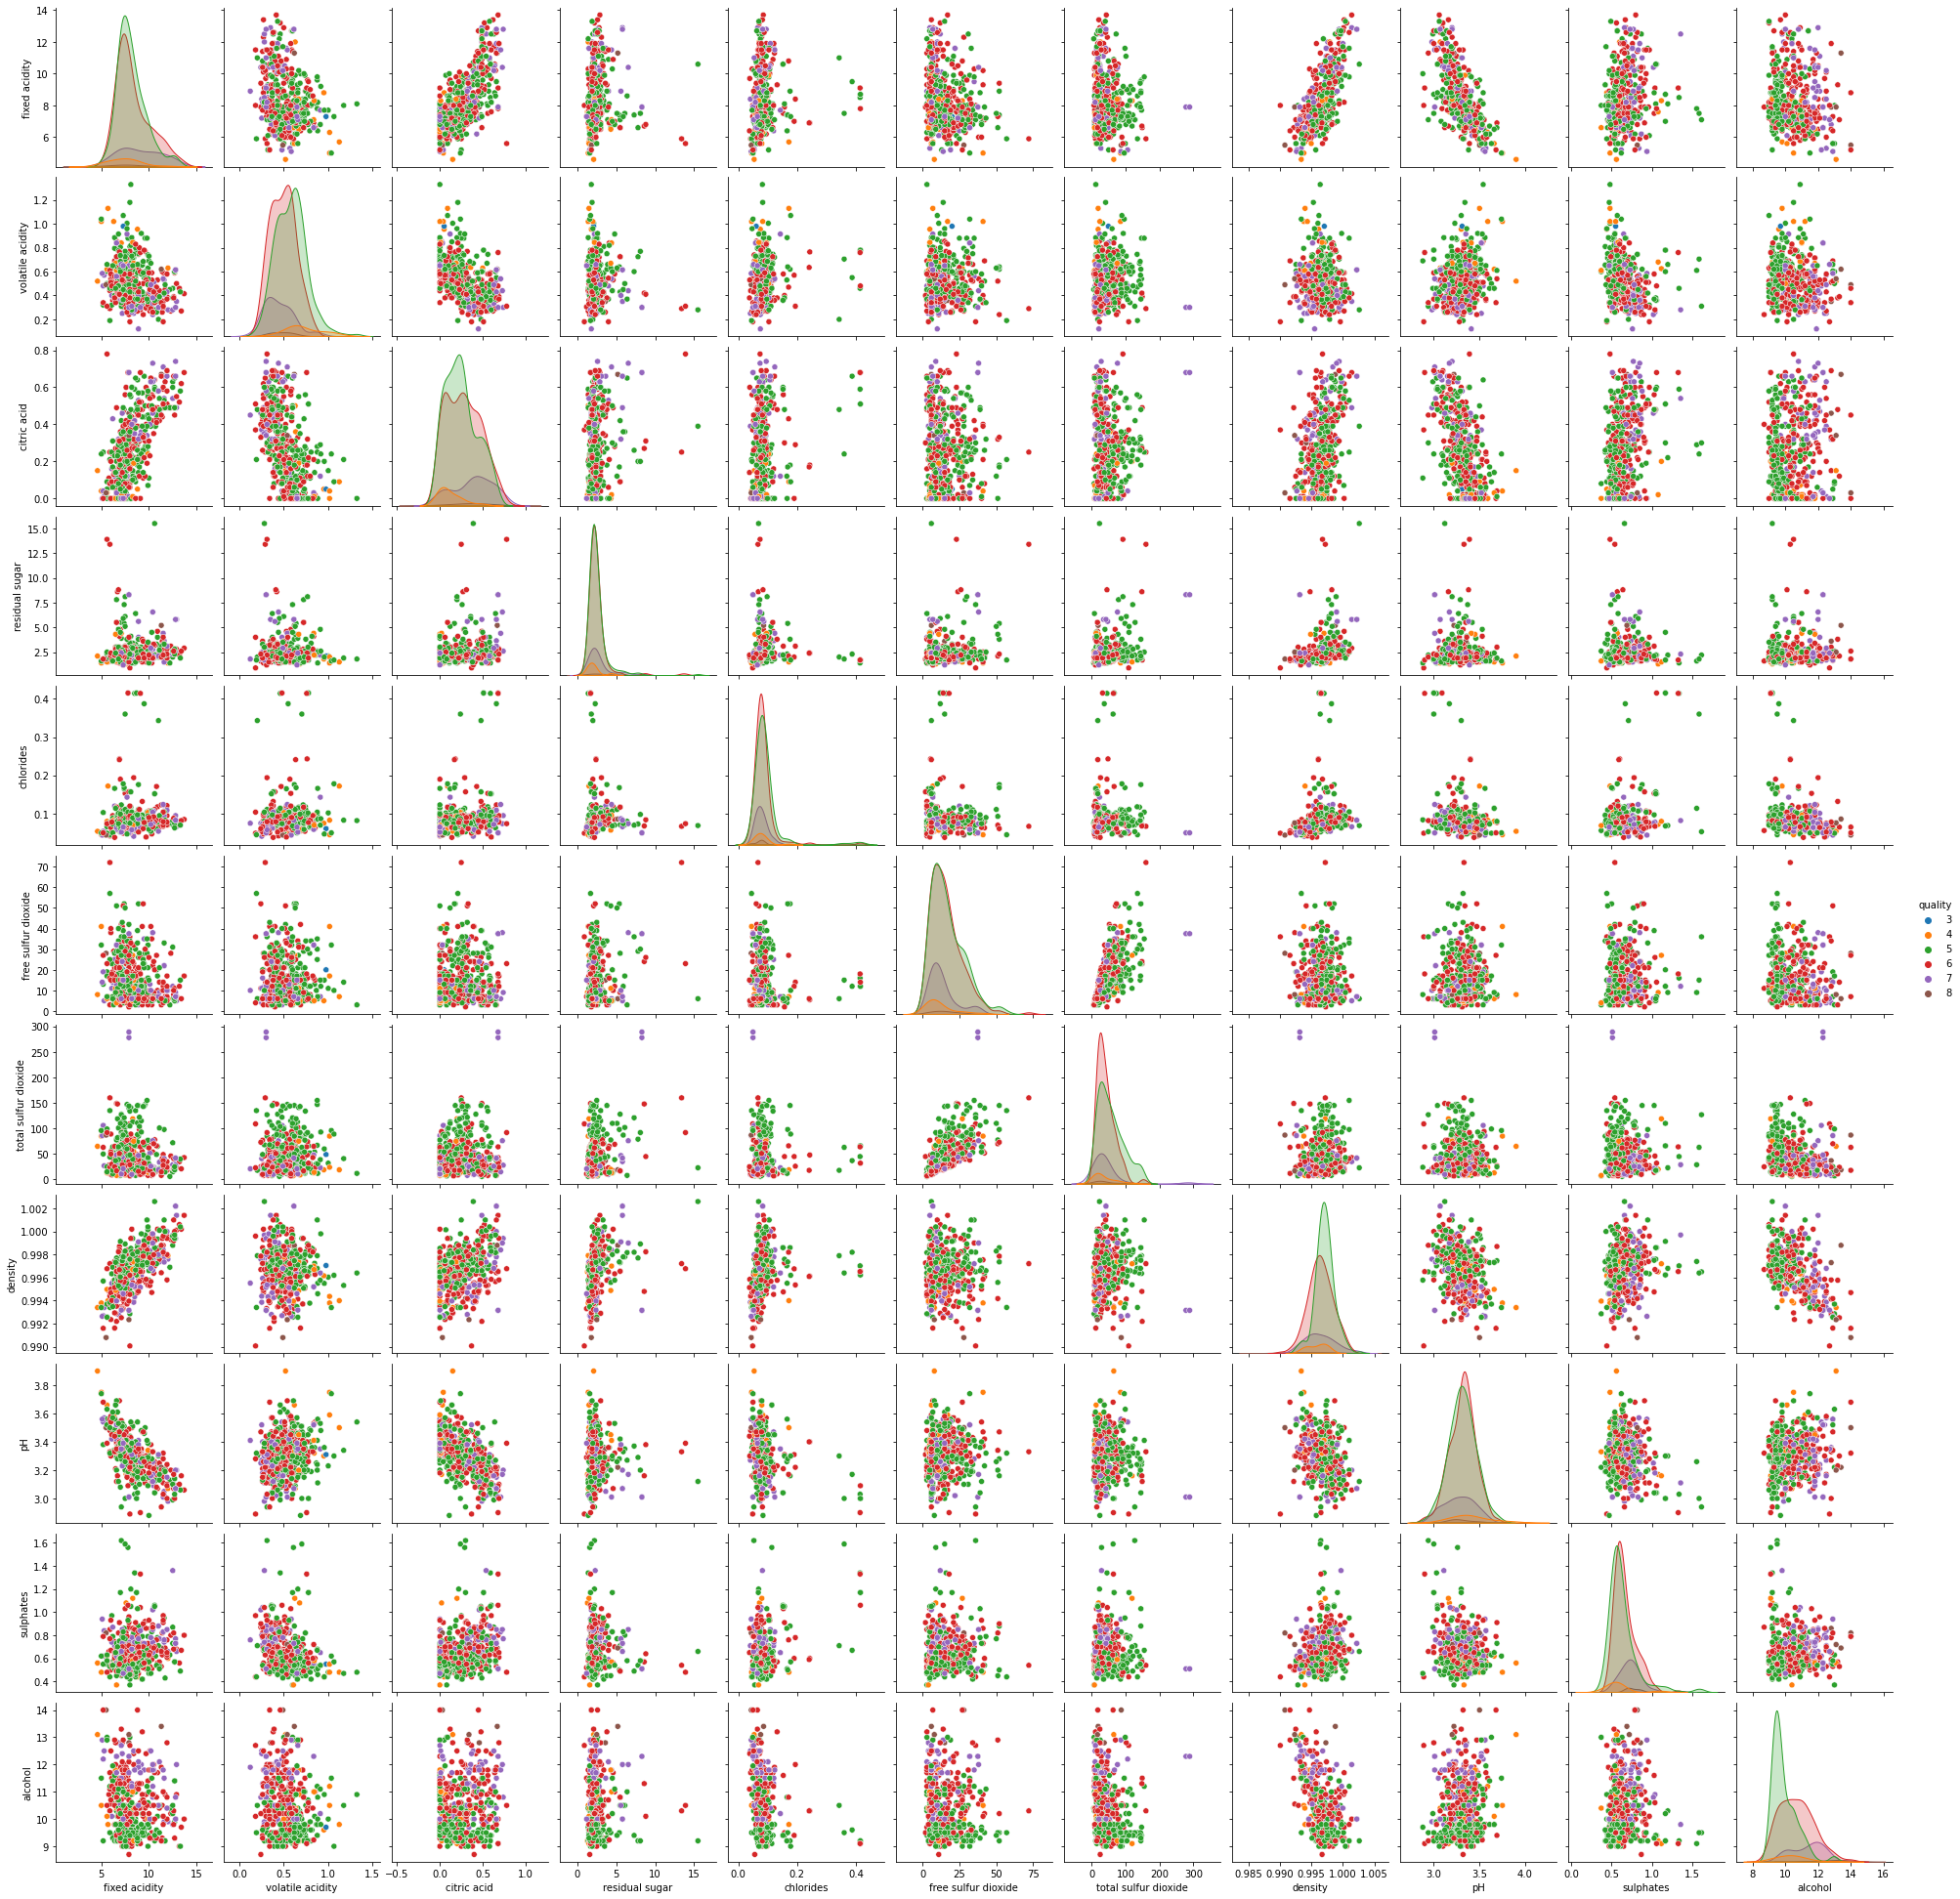

In [13]:
# Limit the plot to only 500 points to help reduce overplotting
sns.pairplot(wine.sample(500), hue='quality', palette="tab10");

Perform correlation analysis on the data columns. Exclude the `quality` column from the correlation analysis. 

In [14]:
wine_cor = wine.drop('quality', 1).corr()
wine_cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In Day 9 exercises, we used the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to draw a heatmap of correlation values to help us identify columns that are highly correlated.  Code similar to the following was used in Day 9 exercises. Adapt it here to fit your variables.

```python
plt.figure(figsize=(10, 10))
sns.heatmap(wine_cor, vmin=-1, vmax=1, annot=True, square=True);
```

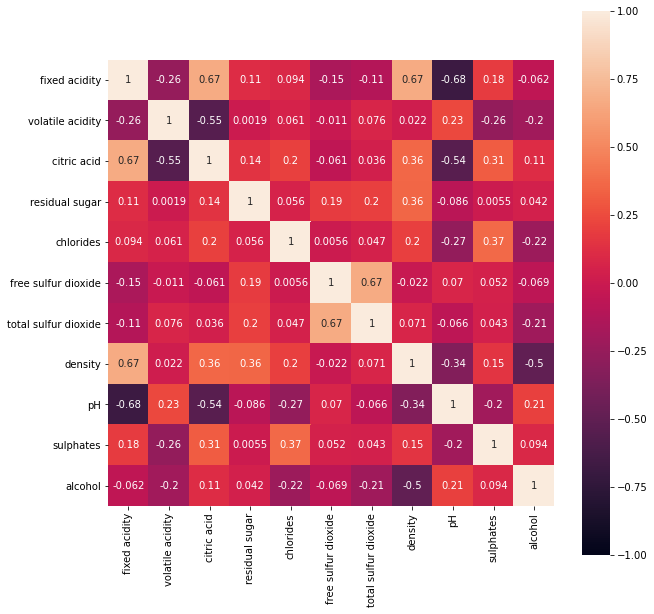

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine_cor, vmin=-1, vmax=1, annot=True, square=True);

<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span>You may be interested to group data columns by their similarity profiles. For this, use the Seaborn [seaborn.culstermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function instead. It will order the data columns by similarity and provide a dendgrogram on both the `x` and `y` axes to indicate relationships of simlarity.  The following code example will create this plot. Adapt it for your variables.

```python
sns.clustermap(wine_cor, vmin=-1, vmax=1);
```

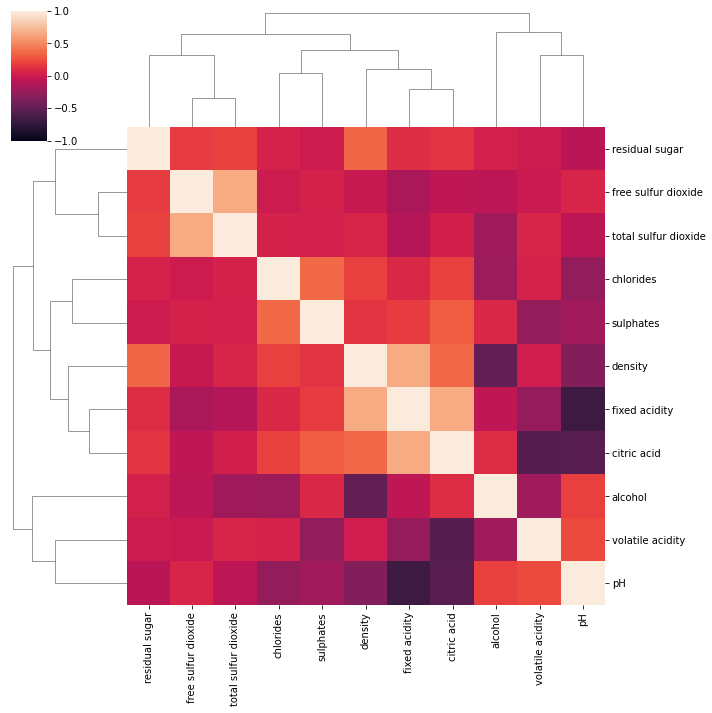

In [16]:
sns.clustermap(wine_cor, vmin=-1, vmax=1);

## Exercise 4:  Cleaning the data

In summary, what important observations can we make from the exploration of both the dependent and independent variables in the data?

What type of  cleaning decisions should be made?

Is the data Tidy?  Do we need to adjust it?

Yes and No.  If the measurement method is condidered values of a variable then the data is not Tidy. Remember we needed to Tidy the data to make it work with the FacetGrid as that plotting tool expected the measurment method to be a categorical value.  For machine learning, we want the measurment methods to be considered their own variables, each with the potential to inform the outcome. So, in this case the data is Tidy.

## Exercise 5: Use SML Classification Models 

First, separate out the outcome (dependent) variable and our observed (independent) data variables. Save these into variables named `X` and `Y`.

In [17]:
#['citic acid', 'free sulfur dioxide', 'fixed acidity', 'quality']
X = wine.loc[:, ['volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
X

array([[ 0.7  ,  1.9  ,  0.076, ...,  3.51 ,  0.56 ,  9.4  ],
       [ 0.88 ,  2.6  ,  0.098, ...,  3.2  ,  0.68 ,  9.8  ],
       [ 0.76 ,  2.3  ,  0.092, ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 0.51 ,  2.3  ,  0.076, ...,  3.42 ,  0.75 , 11.   ],
       [ 0.645,  2.   ,  0.075, ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  3.6  ,  0.067, ...,  3.39 ,  0.66 , 11.   ]])

In [18]:
Y = wine['quality'].values
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

Normalize the observed data. Be sure to use the [normalization strategy](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) best suited for the observations about the data.

In [19]:
X = preprocessing.robust_scale(X)
X

array([[ 0.72      , -0.42857143, -0.15      , ...,  1.05263158,
        -0.33333333, -0.5       ],
       [ 1.44      ,  0.57142857,  0.95      , ..., -0.57894737,
         0.33333333, -0.25      ],
       [ 0.96      ,  0.14285714,  0.65      , ..., -0.26315789,
         0.16666667, -0.25      ],
       ...,
       [-0.04      ,  0.14285714, -0.15      , ...,  0.57894737,
         0.72222222,  0.5       ],
       [ 0.5       , -0.28571429, -0.2       , ...,  1.36842105,
         0.5       ,  0.        ],
       [-0.84      ,  2.        , -0.6       , ...,  0.42105263,
         0.22222222,  0.5       ]])

Generate the training set such that 20% of the data is left for testing and 80% for training.   Name the variables with the training data as `Xt` and `Yt` respectively. Name the data used for testing/validation as `Xv` and `Yv`

In [26]:
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=10)
print("The sizes of the training independent and dependent datasets")
print(Xt.size)
print(Yt.size)
print("The sizes of the testing (validation) independent and dependent datasets")
print(Xv.size)
print(Yv.size)

The sizes of the training independent and dependent datasets
10232
1279
The sizes of the testing (validation) independent and dependent datasets
2560
320


Create a k-fold cross-validation strategy object to be used by the model that will be used to split the training data into 10 equal parts.

In [21]:
kfold = model_selection.KFold(n_splits=10, random_state=10)

C:\Users\shres\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Use the following array to store results:
```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10),
    'RandomForestClassifier': np.zeros(10)
}
```

Execute a Logistic Regression classifier model

In [24]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

C:\Users\shres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shres\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

NameError: name 'results' is not defined

Execute a Linear Discriminant Analysis classifier model

In [25]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

NameError: name 'results' is not defined

Execute a K Neighbors classifier model

Execute a Decision Tree classifier model

Execute a GaussianNB classifier model

Execute a Support Vector Machine (SVC) classifier model

Execute a Random Forest classifier model. This is new!

<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span> You've already been introduced to classificaiton trees. A random forest is an extension in that it fits a number of decision tree classifiers on various sub-samples of the dataset and then averages those results. This improves predictive accuracy and controls over-fitting. Learn more at the [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) page.

Here's an example for use of the `RandomForestClassifier`:
```python
alg = RandomForestClassifier(n_estimators=100)
```

Plot the results of each of the models. Which performed best?

## Exercise 6: Use the Model to Predict.

Create a new object of the classifier that performed best:

Create a new model by fitting it with the training data (the same data we just used to evaulate all those different models).

Using the testing data, predict the wine quality by providing our testing data. Now that the model has been trained, it will predict a quality score using the smaller validation testing dataset.  Save the result in a new variable named `predictions`

Briefly, let's view the contents of the predictions array.

What is the overall accuracy of the predictions?

Create the confusion matrix and use the Seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to explore how well the model worked. (Note, this may take awhile to create). For the heatmap, be sure to
+ Show the values of the confusion matrix in the cells of the heatmap
+ Set the x-axis and y-axis labels.

Finally, generate and print the classification report